# NumPy

Sources: 
1. This notebook is adapted from [Numerical Computing in Python](https://github.com/phelps-sg/python-bigdata/blob/master/src/main/ipynb/numerical-slides.ipynb) originally authored by [Steve Phelps](http://sphelps.net)
2. [Numerical Python: A Practical Techniques Approach for Industry](http://jrjohansson.github.io/numericalpython.html) book, [Chapter 2: Vectors, matrices and multidimensional arrays](http://nbviewer.ipython.org/github/jrjohansson/numerical-python-book-code/blob/master/ch02-code-listing.ipynb)


# Basic information about numerical values

## Scientific Notation in Python

- Python uses Scientific notation when it displays floating-point numbers:


In [1]:
print(6720000000000000.0)

6720000000000000.0


In [2]:
print(67200000000000000.0)

6.72e+16


- Note that internally, the value is not *represented* exactly like this.  

- Scientific notation is a convention for writing or rendering numbers, *not* representing them digitally. 

## Double and single precision formats

Numbers are stored as bits, and storing large numbers or floating point numbers needs a workaround. Here's mantissa and exponent

![mantissa-exponent](https://wikimedia.org/api/rest_v1/media/math/render/svg/8573a801876eeb57196afa082267ede480c64cbb)

The number of bits allocated to represent each integer component of a float is given below:



| **Format**   | **Sign** |   **Exponent** | **Mantissa** |  **Total** |
| ------------ | -------- | -------------- | ------------ | ---------- |
| **single**   | 1      | 8        | 23        | 32
| **double**   | 1      | 11       | 52        | 64 

- Python normally works 64-bit precision.

- `numpy` allows us to [specify the type](http://docs.scipy.org/doc/numpy/user/basics.types.html) when storing data in arrays.

- This is particularly useful for big data where we may need to be careful about the storage requirements of our data-set.


## Not A Number (`NaN`) in Python

- Some mathematical operations on real numbers do not map onto real numbers.

- These results are represented using the special value to `NaN` which represents "not a (real) number".

- `NaN` is represented by an exponent of all 1s, and a non-zero mantissa.


In [3]:
from numpy import sqrt, inf, isnan, nan
x = sqrt(-1)
x

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


nan

In [4]:
y = inf - inf
y

nan

## Comparing `nan` values in Python

- Beware of comparing `nan` values

In [5]:
x == y

False

- To test whether a value is `nan` use the `isnan` function:

In [6]:
isnan(x)

True

## `NaN` is not the same as `None`

- `None` represents a *missing* value.

- `NaN` represents an *invalid* floating-point value.

- These are fundamentally different entities:
    

In [7]:
nan is None

False

In [8]:
isnan(None)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


## Catastrophic Cancellation

- Suppose we have two real values $x$ and $y = x + \epsilon$.

- $\epsilon$ is very small and $x$ is very large.

- $x$ has an _exact_ floating point representation

- However, because of lack of precision $x$ and $y$ have the same floating
point representation.

  - i.e. they are represented as the same sequence of 64-bits


In [9]:
x = 3.141592653589793
x

3.141592653589793

In [10]:
y = 6.022e23
x = (x + y) - y

In [11]:
x

0.0


- Avoid subtracting two nearly-equal numbers.

- Especially in a loop!

- Better-yet use a well-validated existing implementation in the form of a numerical library.


# Importing numpy


- Functions for numerical computiing are provided by a separate _module_ called [`numpy`](http://www.numpy.org/).  

- Before we use the numpy module we must import it.

- By convention, we import `numpy` using the alias `np`.

- Once we have done this we can prefix the functions in the numpy library using the prefix `np.`

In [12]:
import numpy as np

- We can now use the functions defined in this package by prefixing them with `np`.  


# Arrays

- Arrays represent a collection of values.

- In contrast to lists:
    - arrays typically have a *fixed length*
        - they can be resized, but this involves an expensive copying process.
    - and all values in the array are of the *same type*.
        - typically we store floating-point values.

- Like lists:
    - arrays are *mutable*;
    - we can change the elements of an existing array.


## Arrays in `numpy`

    
- Arrays are provided by the `numpy` module.

- The function `array()` creates an array given a list.

In [13]:
import numpy as np
x = np.array([0, 1, 2, 3, 4])
x

array([0, 1, 2, 3, 4])

In [14]:
xlist = [0,1,2,3,4]
xlist

[0, 1, 2, 3, 4]

## Array indexing

- We can index an array just like a list

In [15]:
x[4]

4

In [16]:
x[4] = 2
x

array([0, 1, 2, 3, 2])

## Arrays are not lists

- Although this looks a bit like a list of numbers, it is a fundamentally different type of value:

In [17]:
type(x)

numpy.ndarray

- For example, we cannot append to the array:

In [18]:
x.append(5)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

# Functions over arrays

- When we use arithmetic operators on arrays, we create a new array with the result of applying the operator to each element.

In [19]:
y = x * 2
y

array([0, 2, 4, 6, 4])

- The same goes for numerical functions:

In [20]:
x = np.array([-1, 2, 3, -4])
y = abs(x)
y

array([1, 2, 3, 4])

> Remember, this is not possible with a list

In [21]:
a_list=list(range(10))
a_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [22]:
a_list * 2

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [23]:
b_list= [-1,2,3,-4]
abs(b_list)

TypeError: bad operand type for abs(): 'list'

In [24]:
[ abs(num) for num in b_list ]

[1, 2, 3, 4]

# Vectorized functions

- Note that not every function automatically works with arrays.

- Functions that have been written to work with arrays of numbers are called *vectorized* functions.

- Most of the functions in `numpy` are already vectorized.

- You can create a vectorized version of any other function using the higher-order function `numpy.vectorize()`.

## `vectorize` example

In [25]:
def myfunc(x):
    if x >= 0.5:
        return x
    else:
        return 0.0
    
fv = np.vectorize(myfunc)

In [26]:
x = np.arange(0, 1, 0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [27]:
fv(x)

array([0. , 0. , 0. , 0. , 0. , 0.5, 0.6, 0.7, 0.8, 0.9])

In [28]:
myfunc(x)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Populating Arrays

- To populate an array with a range of values we use the `np.arange()` function:


In [29]:
x = np.arange(0, 10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


- We can also use floating point increments.


In [30]:
x = np.arange(0, 1, 0.1)
print(x)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [31]:
range(0,1,0.1)

TypeError: 'float' object cannot be interpreted as an integer

In [33]:
[ i/10 for i in range(10) ]

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Plotting a sine curve

Let's make a list of numbers which are equivalent to 0, 30, 60, 90 and 120 degrees (multiples of pi/6). 

In [34]:
import math

thirties = [i*3.14/6 for i in range(0,5)]
thirties

[0.0, 0.5233333333333333, 1.0466666666666666, 1.57, 2.0933333333333333]

Let's use `math.sin` for calculating sine value

In [35]:
math.sin(thirties[1])

0.4997701026431024

In [36]:
math.sin(thirties)

TypeError: must be real number, not list

Now, let's try `numpy.sin`

In [76]:
import numpy as np
from numpy import pi, sin

sin(thirties)

array([0.        , 0.4997701 , 0.86575984, 0.99999968, 0.8665558 ])

> math.sin is not vectorized, but numpy.sin is..

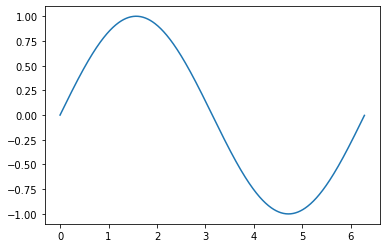

In [77]:
%matplotlib inline

import numpy as np
from numpy import pi, sin
import matplotlib.pyplot as plt


x = np.arange(0, 2*pi, 0.01)
y = sin(x)
plt.plot(x, y)

If we want to use `math.sin` we can not use it on array directly, list comprehension might be used to generate sine values and then used for plotting.

In [78]:
import math

math.sin(x)

TypeError: only size-1 arrays can be converted to Python scalars

In [79]:
import math
y2 = [math.sin(i) for i in x]

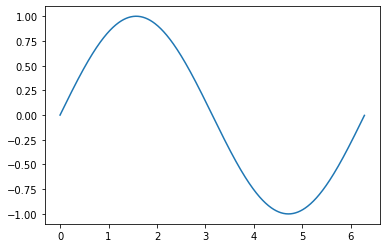

In [80]:
plt.plot(x,y2)

> Remember, last week we calculated `y` list for each `x` value in list via list comprehension (or by loop). Now, it's **vectorized**.

# Multi-dimensional data

- Numpy arrays can hold multi-dimensional data.

- To create a multi-dimensional array, we can pass a list of lists to the `array()` function:

In [81]:
import numpy as np

x = np.array([[1,2], [3,4]])
x

array([[1, 2],
       [3, 4]])

# Arrays containing arrays

- A multi-dimensional array is an array of an arrays.

- The outer array holds the rows.

- Each row is itself an array:

In [82]:
x[0]

array([1, 2])

In [83]:
x[1]

array([3, 4])

- So the element in the second row, and first column is:

In [84]:
x[1][0]

3

# Matrices

- We can create a matrix from a multi-dimensional array.

In [85]:
M = np.matrix(x)
M

matrix([[1, 2],
        [3, 4]])

# Plotting multi-dimensional with matrices

- If we supply a matrix to `plot()` then it will plot the y-values taken from the *columns* of the matrix (notice the transpose in the example below).

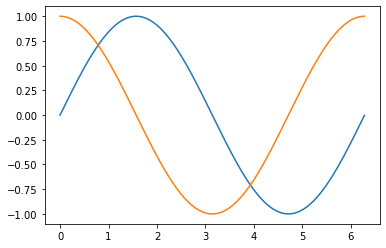

In [86]:
from numpy import pi, sin, cos
import matplotlib.pyplot as plt

x = np.arange(0, 2*pi, 0.01)
y = sin(x)
plt.plot(x, np.matrix([sin(x), cos(x)]).T)

In [87]:
np.matrix([sin(x), cos(x)])

matrix([[ 0.        ,  0.00999983,  0.01999867, ..., -0.02318323,
         -0.01318493, -0.0031853 ],
        [ 1.        ,  0.99995   ,  0.99980001, ...,  0.99973123,
          0.99991308,  0.99999493]])

In [88]:
np.matrix([sin(x), cos(x)]).T

matrix([[ 0.        ,  1.        ],
        [ 0.00999983,  0.99995   ],
        [ 0.01999867,  0.99980001],
        ...,
        [-0.02318323,  0.99973123],
        [-0.01318493,  0.99991308],
        [-0.0031853 ,  0.99999493]])

# Performance 

- When we use `numpy` matrices in Python the corresponding functions are linked with libraries written in C and FORTRAN.

- For example, see the [BLAS (Basic Linear Algebra Subprograms) library](http://www.netlib.org/blas/).

- These libraries are very fast, and can be configured so that operations are performed in parallel on multiple CPU cores, or GPU hardware.


# Matrix Operators

- Once we have a matrix, we can perform matrix computations.

- To compute the [transpose](http://mathworld.wolfram.com/MatrixTranspose.html) and [inverse](http://mathworld.wolfram.com/MatrixInverse.html) use the `T` and `I` attributes:

To compute the transpose $M^{T}$

In [89]:
M

matrix([[1, 2],
        [3, 4]])

In [90]:
M.T


matrix([[1, 3],
        [2, 4]])

To compute the inverse $M^{-1}$

In [91]:
M.I

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

**Reminder**

![matrix inverse](https://www.onlinemathlearning.com/image-files/xinverse-matrix.png.pagespeed.ic.XsopkHSFH7.png)

*[image source](https://www.onlinemathlearning.com/image-files/xinverse-matrix.png.pagespeed.ic.XsopkHSFH7.png)*

# Matrix Dimensions

- The total number of elements, and the dimensions of the array:

In [92]:
M.size

4

In [93]:
M.shape

(2, 2)

In [94]:
len(M.shape)

2

# Creating Matrices from strings

- We can also create arrays directly from strings, which saves some typing:

In [95]:
I2 = np.matrix('2 0; 0 2')
I2

matrix([[2, 0],
        [0, 2]])

- The semicolon starts a new row.

# Matrix addition

Two matrices must have an equal number of rows and columns to be added. The sum of two matrices A and B will be a matrix which has the same number of rows and columns as do A and B. The sum of A and B, denoted A + B, is computed by adding corresponding elements of A and B.

For example:

![matrix addition](https://wikimedia.org/api/rest_v1/media/math/render/svg/b7da39614abf8978240dd50e3111f7dfa416daa1)

# Matrix Multiplication

Now that we have two matrices, we can perform [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication):

![mat multiplication](http://www.mathcs.emory.edu/~cheung/Courses/554/Syllabus/9-parallel/FIGS/mat-mult01.gif)

[image source](http://www.mathcs.emory.edu/~cheung/Courses/554/Syllabus/9-parallel/matrix-mult.html)

In [96]:
M * I2

matrix([[2, 4],
        [6, 8]])

`dot` command can be used for matrix multiplication as well.

In [97]:
np.dot(M, I2)

matrix([[2, 4],
        [6, 8]])

### Example

Let's practice matrix addition and multiplication with the matrix operations used in homework. Let's calculate this operation for x,y = 1,1

![fern-homework](https://wikimedia.org/api/rest_v1/media/math/render/svg/687f3f274b69c4e3597a470065d3669e137e7e36)

In [98]:
import numpy as np

left_leaf = np.matrix('0.20 -0.26; 0.23 0.22')
left_leaf

matrix([[ 0.2 , -0.26],
        [ 0.23,  0.22]])

In [99]:
coord = (1,1)
product = np.dot(left_leaf , np.matrix(coord).T)

product

matrix([[-0.06],
        [ 0.45]])

In [100]:
product + np.matrix((0.0,1.6)).T

matrix([[-0.06],
        [ 2.05]])

# Matrix Indexing


- We can [index and slice matrices](http://docs.scipy.org/doc/numpy/user/basics.indexing.html) using the same syntax as lists.

In [101]:
M

matrix([[1, 2],
        [3, 4]])

In [102]:
M[:,1]

matrix([[2],
        [4]])

# Slices are references

- If we use this is an assignment, we create a *reference* to the sliced elements, *not* a copy.

In [103]:
V = M[:,1]  # This does not make a copy of the elements!
V

matrix([[2],
        [4]])

In [104]:
M[0,1] = -2
V

matrix([[-2],
        [ 4]])

Please visualize this at [pythontutor page](https://goo.gl/gYPHQZ)

Code to paste: (pythontutor does not support numpy)
```python
M_list=[[2,3],[4,5]]

V = M_list[1]
print(V)

M_list[1][1] = -2
print(V)
```

## Copying matrices and vectors

- To copy a matrix, or a slice of its elements, use the function `np.copy()`:



In [105]:
M = np.matrix('1 2; 3 4')
V = np.copy(M[:,1])  # This does copy the elements.
V

array([[2],
       [4]])

In [106]:
M[0,1] = -2
V

array([[2],
       [4]])

# Sums

One way we _could_ sum a vector or matrix is to use a `for` loop.

In [107]:
vector = np.arange(0.0, 100.0, 10.0)
vector


array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [108]:
result = 0.0
for x in vector:
    result = result + x
result

450.0

- This is not the most _efficient_ way to compute a sum.

## Efficient sums

- Instead of using a `for` loop, we can use a numpy function `sum()`.

- This function is written in the C language, and is very fast.


In [109]:
vector = np.array([0, 1, 2, 3, 4])
print( np.sum(vector) )

10


## Summing rows and columns

- When dealing with multi-dimensional data, the 'sum()' function has a named-argument `axis` which allows us to specify whether to sum along, each rows or columns.


In [110]:
matrix = np.matrix('1 2 3; 4 5 6; 7 8 9')
print(matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


- To sum along columns:

In [111]:
np.sum(matrix, axis=0)

matrix([[12, 15, 18]])

- To sum along rows:

In [112]:
np.sum(matrix, axis=1)

matrix([[ 6],
        [15],
        [24]])

## Cumulative sums

- Suppose we want to compute $y_n = \sum_{i=1}^{n} x_i$ where $\mathbf{x}$ is a vector.


In [113]:
import numpy as np
x = np.array([0, 1, 2, 3, 4])
y = np.cumsum(x)
print(y)

[ 0  1  3  6 10]


## Cumulative sums along rows and columns


In [114]:
x = np.matrix('1 2 3; 4 5 6; 7 8 9')
print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [115]:
y = np.cumsum(x)
np.cumsum(x, axis=0)

matrix([[ 1,  2,  3],
        [ 5,  7,  9],
        [12, 15, 18]])

In [116]:
np.cumsum(x, axis=1)

matrix([[ 1,  3,  6],
        [ 4,  9, 15],
        [ 7, 15, 24]])

## Cumulative products

- Similarly we can compute $y_n = \Pi_{i=1}^{n} x_i$ using `cumprod()`:


In [117]:
import numpy as np
x = np.array([1, 2, 3, 4, 5])
np.cumprod(x)

array([  1,   2,   6,  24, 120])

- We can compute cummulative products along rows and columns using the `axis` parameter, just as with the `cumsum()` example.

# Generating (pseudo) random numbers

- The nested module `numpy.random` contains functions for generating random numbers from different probability distributions.


In [118]:
from numpy.random import normal, uniform, exponential, randint

- Suppose that we have a random variable $\epsilon \sim N(0, 1)$.

- In Python we can draw from this distribution like so:

In [119]:
epsilon = normal()
print(epsilon)

0.0802333609595309


- If we execute another call to the function, we will make a _new_ draw from the distribution:

In [120]:
epsilon = normal()
print(epsilon)

-0.7713180651974674


## Pseudo-random numbers

- Strictly speaking, these are not random numbers.

- They rely on an initial state value called the *seed*.

- If we know the seed, then we can predict with total accuracy the rest of the sequence, given any "random" number.

- Nevertheless, statistically they behave like independently and identically-distributed values.
    - Statistical tests for correlation and auto-correlation give insignificant results.

- For this reason they called *pseudo*-random numbers.

- The algorithms for generating them are called Pseudo-Random Number Generators (PRNGs).

- Some applications, such as cryptography, require genuinely unpredictable sequences.
    - never use a standard PRNG for these applications!

## Managing seed values

- In some applications we need to reliably reproduce the same sequence of pseudo-random numbers that were used.

- We can specify the seed value at the beginning of execution to achieve this.

- Use the function `seed()` in the `numpy.random` module.



## Setting the seed

In [121]:
from numpy.random import seed

seed(5)


In [122]:
normal()

0.44122748688504143

In [123]:
normal()

-0.33087015189408764

In [124]:
seed(5)

In [125]:
normal()

0.44122748688504143

In [126]:
normal()

-0.33087015189408764

# Drawing multiple variates

- To generate more than number, we can specify the `size` parameter:

In [127]:
normal(size=10)

array([ 2.43077119, -0.25209213,  0.10960984,  1.58248112, -0.9092324 ,
       -0.59163666,  0.18760323, -0.32986996, -1.19276461, -0.20487651])

- If you are generating very many variates, this will be *much* faster than using a for loop

- We can also specify more than one dimension:


In [128]:
normal(size=(5,5))

array([[-0.35882895,  0.6034716 , -1.66478853, -0.70017904,  1.15139101],
       [ 1.85733101, -1.51117956,  0.64484751, -0.98060789, -0.85685315],
       [-0.87187918, -0.42250793,  0.99643983,  0.71242127,  0.05914424],
       [-0.36331088,  0.00328884, -0.10593044,  0.79305332, -0.63157163],
       [-0.00619491, -0.10106761, -0.05230815,  0.24921766,  0.19766009]])

# Array with specific type

You can pass in a second argument to array that gives the numeric type. There are a number of types listed here that your matrix can be. Some of these are aliased to single character codes. The most common ones are 'd' (double precision floating point number), 'D' (double precision complex number), and 'i' (int32).


In [129]:
np.array([1,2,3,4,5,6])

array([1, 2, 3, 4, 5, 6])

In [130]:
np.array([1,2,3,4,5,6],'d')

array([1., 2., 3., 4., 5., 6.])

In [131]:
np.array([1,2,3,4,5,6],'D')

array([1.+0.j, 2.+0.j, 3.+0.j, 4.+0.j, 5.+0.j, 6.+0.j])

In [132]:
np.array([1,2,3,4,5,6],'i')

array([1, 2, 3, 4, 5, 6], dtype=int32)

# Empty and identity matrices

`zeros` function is used for generating empty arrays or matrices

In [133]:
np.zeros((3,3),'d')

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [134]:
np.zeros((3,1))

array([[0.],
       [0.],
       [0.]])

In [135]:
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

# Histograms

- We can plot a histograms of randomly-distributed data using the `hist()` function from matplotlib:

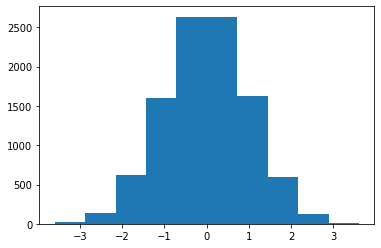

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline

data = normal(size=10000)
ax = plt.hist(data)

# Computing histograms as matrices

- The function `histogram()` in the `numpy` module will count frequencies into bins and return the result as a 2-dimensional array.

In [137]:
import numpy as np
np.histogram(data)

(array([  23,  136,  618, 1597, 2626, 2635, 1620,  599,  130,   16]),
 array([-3.59780883, -2.87679609, -2.15578336, -1.43477063, -0.71375789,
         0.00725484,  0.72826758,  1.44928031,  2.17029304,  2.89130578,
         3.61231851]))

In [138]:
(counts,boundaries)=np.histogram(data)
counts

array([  23,  136,  618, 1597, 2626, 2635, 1620,  599,  130,   16])

In [139]:
boundaries

array([-3.59780883, -2.87679609, -2.15578336, -1.43477063, -0.71375789,
        0.00725484,  0.72826758,  1.44928031,  2.17029304,  2.89130578,
        3.61231851])

# Summary statistics

- We can compute the summary statistics of a sample of values using the numpy functions `mean()` and `var()` to compute the sample mean $\bar{X}$ and sample [variance](https://en.wikipedia.org/wiki/Variance) $\sigma_{X}^2$ .


In [140]:
np.mean(data)

-0.00045461080333497925

In [141]:
np.var(data)

1.0016048722546331

- These functions also have an `axis` parameter to compute mean and variances of columns or rows of a multi-dimensional data-set.

# Summary statistics with `nan` values

- If the data contains `nan` values, then the summary statistics will also be `nan`.



In [142]:
from numpy import nan
import numpy as np
data = np.array([1, 2, 3, 4, nan])
np.mean(data)

nan

- To omit `nan` values from the calculation, use the functions `nanmean()` and `nanvar()`:

In [143]:
np.nanmean(data)

2.5

# Discrete random numbers

- The `randint()` function in `numpy.random` can be used to draw from a uniform discrete probability distribution.

- It takes two parameters: the low value (inclusive), and the high value (exclusive).

- So to simulate one roll of a die, we would use the following Python code.


In [144]:
die_roll = randint(0, 6) + 1
die_roll

4

- Just as with the `normal()` function, we can generate an entire sequence of values.

In [145]:
trials = randint(0, 2, size = 20)
trials

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0])

# Sequences, ranges

The linspace command makes a linear array of points from a starting to an ending value.

In [146]:
np.linspace(0,1)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

If you provide a third argument, it takes that as the number of points in the space. If you don't provide the argument, it gives a length 50 linear space.

In [147]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

linspace is an easy way to make coordinates for plotting. Functions in the numpy library (all of which are imported into IPython notebook) can act on an entire vector (or even a matrix) of points at once. Thus,

In [148]:
x = np.linspace(0,2*pi)
np.sin(x)

array([ 0.00000000e+00,  1.27877162e-01,  2.53654584e-01,  3.75267005e-01,
        4.90717552e-01,  5.98110530e-01,  6.95682551e-01,  7.81831482e-01,
        8.55142763e-01,  9.14412623e-01,  9.58667853e-01,  9.87181783e-01,
        9.99486216e-01,  9.95379113e-01,  9.74927912e-01,  9.38468422e-01,
        8.86599306e-01,  8.20172255e-01,  7.40277997e-01,  6.48228395e-01,
        5.45534901e-01,  4.33883739e-01,  3.15108218e-01,  1.91158629e-01,
        6.40702200e-02, -6.40702200e-02, -1.91158629e-01, -3.15108218e-01,
       -4.33883739e-01, -5.45534901e-01, -6.48228395e-01, -7.40277997e-01,
       -8.20172255e-01, -8.86599306e-01, -9.38468422e-01, -9.74927912e-01,
       -9.95379113e-01, -9.99486216e-01, -9.87181783e-01, -9.58667853e-01,
       -9.14412623e-01, -8.55142763e-01, -7.81831482e-01, -6.95682551e-01,
       -5.98110530e-01, -4.90717552e-01, -3.75267005e-01, -2.53654584e-01,
       -1.27877162e-01, -2.44929360e-16])

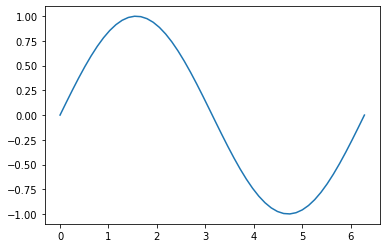

In [149]:
import matplotlib.pyplot as plt
plt.plot(x,sin(x))

# Acknowledgements

The earlier sections of this notebook were adapted from [an article on floating-point numbers](http://steve.hollasch.net/cgindex/coding/ieeefloat.html) written by [Steve Hollasch](http://steve.hollasch.net/).

# Finally

please follow the example at http://nbviewer.jupyter.org/url/atwallab.cshl.edu/teaching/QBbootcamp3.ipynb